<a href="https://colab.research.google.com/github/andrec230/MicroServicios/blob/master/MODELO_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe final Métodos estadísticos avanzados**
> ## Integrantes

*   Javier Leomar Matamoros
*   Juan David Botero
*   Sebastián Obando
*   Andrés Castro




> Repositorio:
https://github.com/andrec230/MicroServicios/blob/master/MODELO_C1.ipynb

# 0. SET UP


## Cargue de librerias:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cargar bases de datos:

# 1. FORMULACIÓN DE LA PREGUNTA

# ¿Cuáles serán los costos de venta para 2020 de cada empresa de un sector en específico basado en 4 observaciones por empresa (2016,2017,2018,2019)? 

> ## **Estimación de esfuerzo:**
> Para la estimación se hará uso de una escala de **1-5**
*  Consolidación de información **(4)**
*  Transformación de varibles y análisis descriptivo **(4)**
*  Ajuste y validación de modelos **(4)**
*  Redacción del reporte **(3)**

# 2. RECOLECCIÓN DE DATOS

### Estado de resultados:

In [2]:
ERI_2016 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/16SbMAj3b2I1Fmyee2k-fkHFKMyPKv3PFYNwZ10zPEWo/export?format=xlsx",sheet_name="ERI") 
ERI_2017 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/1UPmoNXKAbgqpGIGDttcvygMea0nr1zBUZFVoe0-O1fo/export?format=xlsx",sheet_name="Estado de Resultado Integral")
ERI_2018 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/1i2wBZkGwsajRYve2tErYtuLY6FEYZC0X5qGT8Ws2ZDg/export?format=xlsx",sheet_name="ERI")
ERI_2019 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/1q7qNEW_PNG4-IldJN32BKmodgsR3ROCKW7eJKGAGxNg/export?format=xlsx",sheet_name="ERI")

### Carátulas:

In [3]:
CARATULA_2016 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/16SbMAj3b2I1Fmyee2k-fkHFKMyPKv3PFYNwZ10zPEWo/export?format=xlsx",sheet_name="Caratula") 
CARATULA_2017 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/1UPmoNXKAbgqpGIGDttcvygMea0nr1zBUZFVoe0-O1fo/export?format=xlsx",sheet_name="Caratula")
CARATULA_2018 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/1i2wBZkGwsajRYve2tErYtuLY6FEYZC0X5qGT8Ws2ZDg/export?format=xlsx",sheet_name="Carátula")
CARATULA_2019 = pd.read_excel(f"https://docs.google.com/spreadsheets/d/1q7qNEW_PNG4-IldJN32BKmodgsR3ROCKW7eJKGAGxNg/export?format=xlsx",sheet_name="Carátula")

### Variables Macroeconomicas:

In [4]:
macroeconomicas = pd.read_excel(f"https://docs.google.com/spreadsheets/d/1ZLbuI8fbCBFhr4wKTGze4pSN8TNxYT_VHgjw60BunKE/export?format=xlsx",sheet_name="BD") 

## Relaciones:




In [5]:
df_2016 = pd.merge(CARATULA_2017, ERI_2016, how='right') #2016 no viene con el código CIIU
df_2017 = pd.merge(CARATULA_2017, ERI_2017, how='right')
df_2018 = pd.merge(CARATULA_2018, ERI_2018, how='right')
df_2019 = pd.merge(CARATULA_2019, ERI_2019, how='right')

## Limpieza

In [6]:
df_2017 = df_2017[df_2017["Periodo"] == "2017"]

In [7]:
df_2018 = df_2018[df_2018["Periodo"] == "Periodo Actual"]

In [8]:
df_2019 = df_2019[df_2019["Periodo"] == "Periodo Actual"]

## Agregaciones:

### Años:

In [9]:
df_2016['año'] = 2016
df_2017['año'] = 2017
df_2018['año'] = 2018
df_2019['año'] = 2019

### Conteos:

In [10]:
df_2016['#'] = 1
df_2017['#'] = 1
df_2018['#'] = 1
df_2019['#'] = 1

## Selección de variables:

In [11]:
vars = ['Nit','Clasificación Industrial Internacional Uniforme Versión 4 A.C','Costo de ventas','año','#']

## Uniones:

In [12]:
df = df_2016[vars].append([df_2017[vars],df_2018[vars],df_2019[vars]])

In [13]:
df['Nit'] = df['Nit'].astype(str)

In [14]:
df = df[~df['Costo de ventas'].isnull()]

In [15]:
df.to_csv("df.csv")

# 3. EXPLORACIÓN Y VISUALIZACIÓN

### Depuración de los sectores:

#### ¿Cuáles son las empresas que se mantienen durante los 4 años?

In [16]:
empresas = pd.pivot_table(df,values='#',index=['Nit','Clasificación Industrial Internacional Uniforme Versión 4 A.C'],columns='año', aggfunc=np.sum,fill_value=0).reset_index()
empresas['cumplen'] = np.where(((empresas[2016] > 0) & (empresas[2017] > 0) & (empresas[2018] > 0) & (empresas[2019] > 0)), 'SI', 'NO')
empresas = empresas[empresas["cumplen"]=="SI"]
empresas = empresas.sort_values(by="Nit")
empresas = empresas[['Nit','Clasificación Industrial Internacional Uniforme Versión 4 A.C']]
empresas['#'] = 1
empresas.head()

año,Nit,Clasificación Industrial Internacional Uniforme Versión 4 A.C,#
2,800003267.0,C1811 - Actividades de impresión,1
3,800004599.0,G4669 - Comercio al por mayor de otros product...,1
4,800005260.0,G4690 - Comercio al por mayor no especializado,1
6,800007193.0,A0126 - Cultivo de palma para aceite (palma af...,1
7,800007202.0,C2229 - Fabricación de artículos de plástico n...,1


In [17]:
empresas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 2 to 2780
Data columns (total 3 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Nit                                                            1399 non-null   object
 1   Clasificación Industrial Internacional Uniforme Versión 4 A.C  1399 non-null   object
 2   #                                                              1399 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 43.7+ KB


#### ¿Con estas empresas, cuáles son los sectores que tienen al menos 20 empresas?

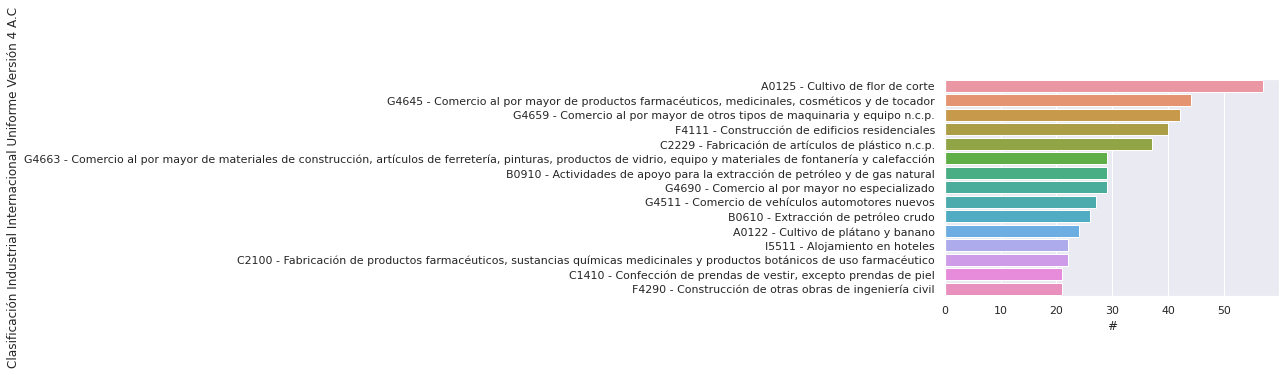

In [18]:
sectores = empresas.groupby("Clasificación Industrial Internacional Uniforme Versión 4 A.C")['#'].sum().reset_index().sort_values(by="#",ascending=False)
sectores = sectores[sectores["#"]>=20]
sns.barplot(y="Clasificación Industrial Internacional Uniforme Versión 4 A.C", x="#", data=sectores)

#### Sector de interes:

In [19]:
sectores["Clasificación Industrial Internacional Uniforme Versión 4 A.C"].unique()

array(['A0125 - Cultivo de flor de corte',
       'G4645 - Comercio al por mayor de productos farmacéuticos, medicinales, cosméticos y de tocador',
       'G4659 - Comercio al por mayor de otros tipos de maquinaria y equipo n.c.p.',
       'F4111 - Construcción de edificios residenciales',
       'C2229 - Fabricación de artículos de plástico n.c.p.',
       'G4663 - Comercio al por mayor de materiales de construcción, artículos de ferretería, pinturas, productos de vidrio, equipo y materiales de fontanería y calefacción',
       'B0910 - Actividades de apoyo para la extracción de petróleo y de gas natural',
       'G4690 - Comercio al por mayor no especializado',
       'G4511 - Comercio de vehículos automotores nuevos',
       'B0610 - Extracción de petróleo crudo',
       'A0122 - Cultivo de plátano y banano',
       'I5511 - Alojamiento en hoteles',
       'C2100 - Fabricación de productos farmacéuticos, sustancias químicas medicinales y productos botánicos de uso farmacéutico',
   

In [20]:
sector = 'A0125 - Cultivo de flor de corte'
empresas_seleccionadas = empresas[empresas['Clasificación Industrial Internacional Uniforme Versión 4 A.C']== sector]
empresas_seleccionadas = empresas_seleccionadas['Nit'].unique()
db = df[df['Nit'].isin(empresas_seleccionadas)]
db = db.drop(['#','Clasificación Industrial Internacional Uniforme Versión 4 A.C'],axis=1)
db.head()

,Nit,Costo de ventas,año
207,860522101.0,12942162.0,2016
236,800130305.0,25818346.0,2016
242,800227103.0,15005652.0,2016
285,830501618.0,52956023.0,2016
312,830085047.0,21218267.0,2016


In [21]:
df_sector = df[df["Nit"].isin(db["Nit"].unique())]

In [22]:
#Costo Muy Alto, Costo Alto, Costo Medio y Costo Bajo

### BASE DE DATOS FINAL

In [23]:
df_final = pd.merge(df_sector, macroeconomicas, how='left')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Nit                                                            228 non-null    object 
 1   Clasificación Industrial Internacional Uniforme Versión 4 A.C  228 non-null    object 
 2   Costo de ventas                                                228 non-null    float64
 3   año                                                            228 non-null    int64  
 4   #                                                              228 non-null    int64  
 5   tasa_de_intervencion                                           228 non-null    float64
 6   balance_en_cuenta_corriente_usd                                228 non-null    int64  
 7   inflación                                                     

## Asignación de datos

In [24]:
data = df_final
data = data.drop(["Clasificación Industrial Internacional Uniforme Versión 4 A.C","#"],axis=1)
data = data.rename(columns={'Costo de ventas': 'costo_de_ventas', 'año':'year', 'Nit':'nit', 'inflación': 'inflacion'})
data.head()

,nit,costo_de_ventas,year,tasa_de_intervencion,balance_en_cuenta_corriente_usd,inflacion,desempleo,pib_usd,trm
0,860522101.0,12942162.0,2016,0.071,-1203600,0.0752,0.0922,28312,3050.98
1,800130305.0,25818346.0,2016,0.071,-1203600,0.0752,0.0922,28312,3050.98
2,800227103.0,15005652.0,2016,0.071,-1203600,0.0752,0.0922,28312,3050.98
3,830501618.0,52956023.0,2016,0.071,-1203600,0.0752,0.0922,28312,3050.98
4,830085047.0,21218267.0,2016,0.071,-1203600,0.0752,0.0922,28312,3050.98


## Análisis descriptivo

### Se exlpora el costo de ventas por año para ver su comportamiento

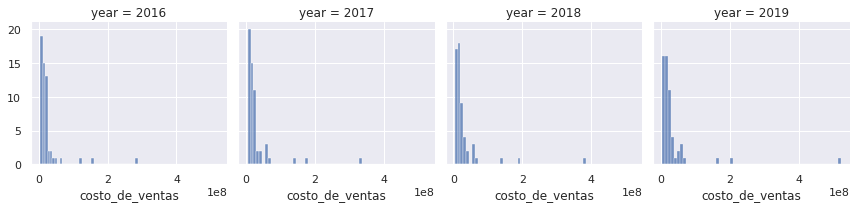

In [25]:
# Histograma costo_de_ventas por año
graph = sns.FacetGrid(data, col="year")
graph.map(sns.histplot,"costo_de_ventas")
# graph.map(sns.histplot,"inflacion")



> Se puede notar un sesgo a la derecha para el costo de ventas en cada año, esto se interpreta como que el costo de ventas para la mayoría de las empresas se mantiene en un nivel bajo, además muy pocas empresas tienen costos de ventas muy altos






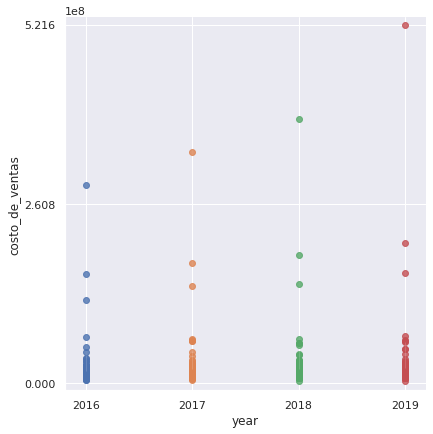

In [26]:
# Se grafica nuevamente el costo de ventas por año como region de puntos para tener una idea de cómo es su distribución
max_y = data.costo_de_ventas.max()
graph = sns.PairGrid(data, y_vars=["costo_de_ventas"], x_vars=["year"], height=6, hue="year")
graph.map(sns.regplot)
graph.set(xlim=(2015.8, 2019.2), ylim=(-max_y*.02, max_y*1.02), yticks=[0, max_y//2, max_y], xticks=[2016, 2017, 2018, 2019])
# graph.add_legend()



> En el gráfico de puntos se puede apreciar que existe un agrupamiento en cada año para valores bajos en los costos de venta y para valores altos, se pueden ver muy pocos puntos lo que indica que pocas empresas incurren en costos muy altos en ventas para el sector seleccionado.


> Se realiza un **boxplot** para identificar visualmente posibles valores atípicos en el costo de ventas por año

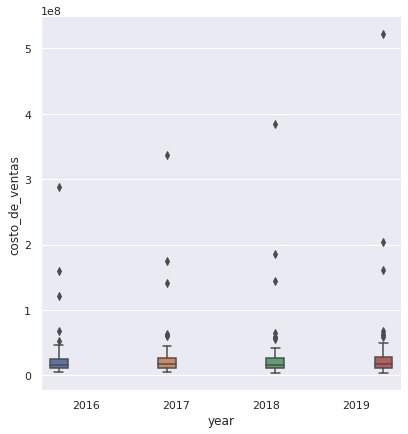

In [50]:
graph = sns.PairGrid(data, y_vars=["costo_de_ventas"], x_vars=["year"], height=6, hue="year")
graph.map(sns.boxplot)

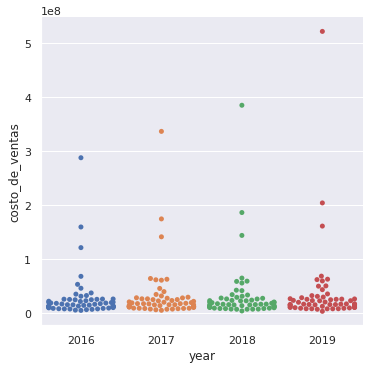

In [28]:
sns.catplot(x="year", y="costo_de_ventas", data=data, kind = "swarm")

> Como se puede ver el boxplot, se presentan valores atípicos en cada año

### Distribución de variables

> Se analiza la variable independiente **costo de ventas** contra las demás variables en el dataset

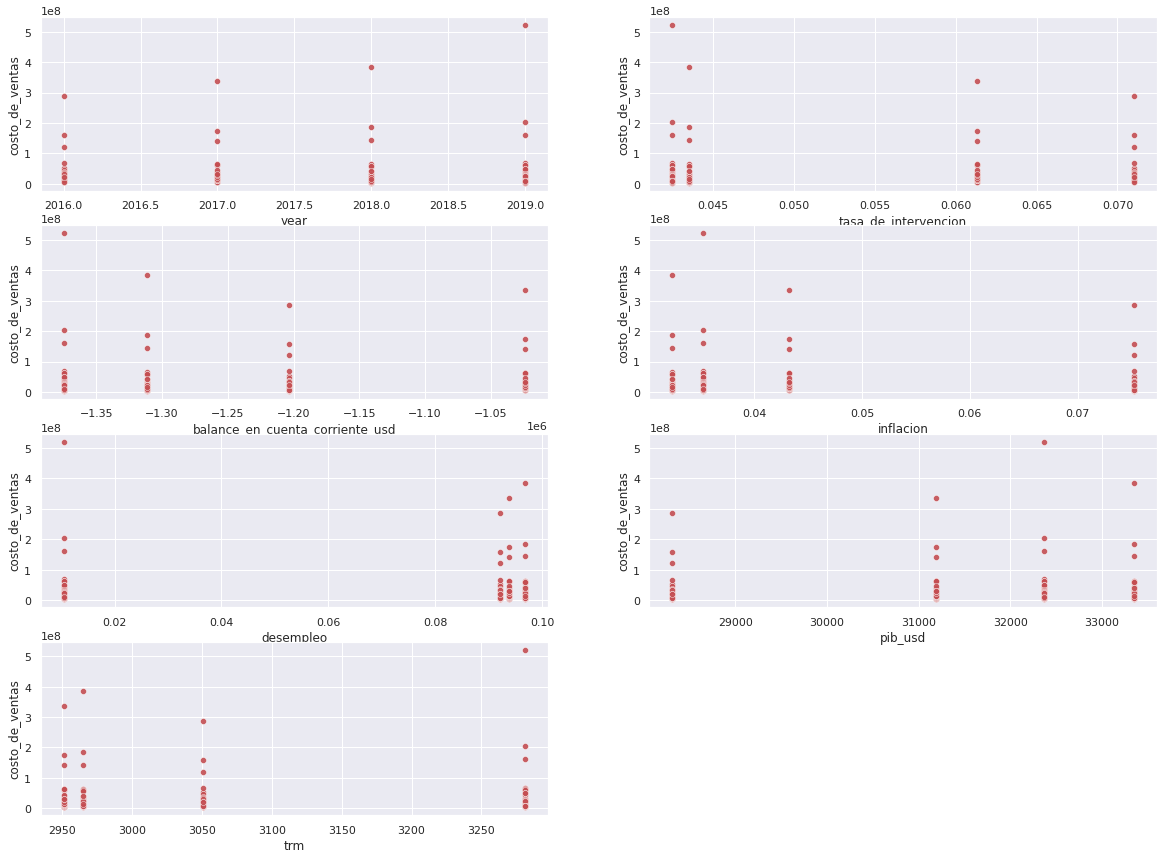

In [29]:
columns = [name for name in data.columns.to_list() if name not in ["costo_de_ventas","nit"]]
plt.figure(figsize=(20,30))
for i,var in enumerate(columns):
    plt.subplot(8,2,i+1)
    sns.scatterplot(x=var,y='costo_de_ventas',data=data, alpha=0.9,color='r')
    

> Se procede a visualizar la una posible relación entre las variables del dataset, de lo que se puede ver que variables como **tasa de intervención** e **inflación**, pueden tener una relación lineal, asi como el **PIB** y la **Inflación**, por lo que se deben tener en cuenta a la hora del planteamiento del modelo si se pueden incluir ambas o se deja por fuera del modelo alguna de ellas.

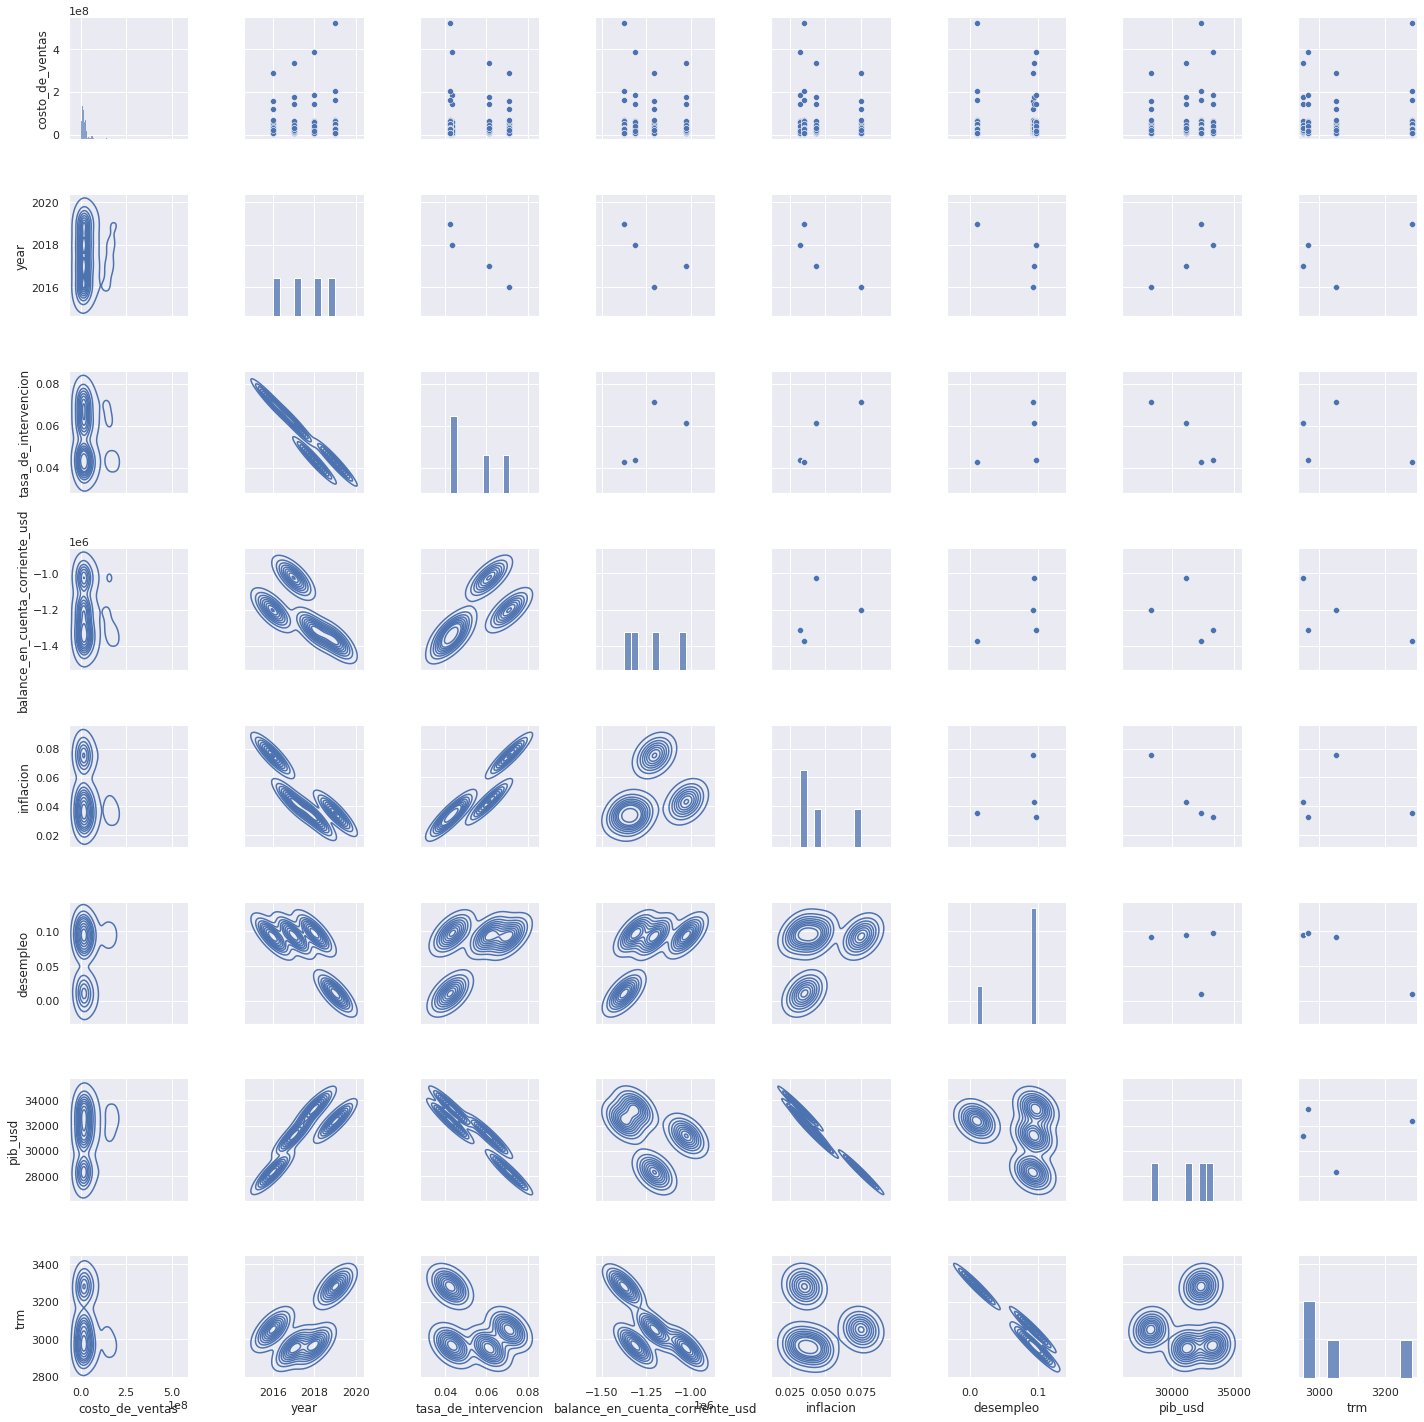

In [30]:
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

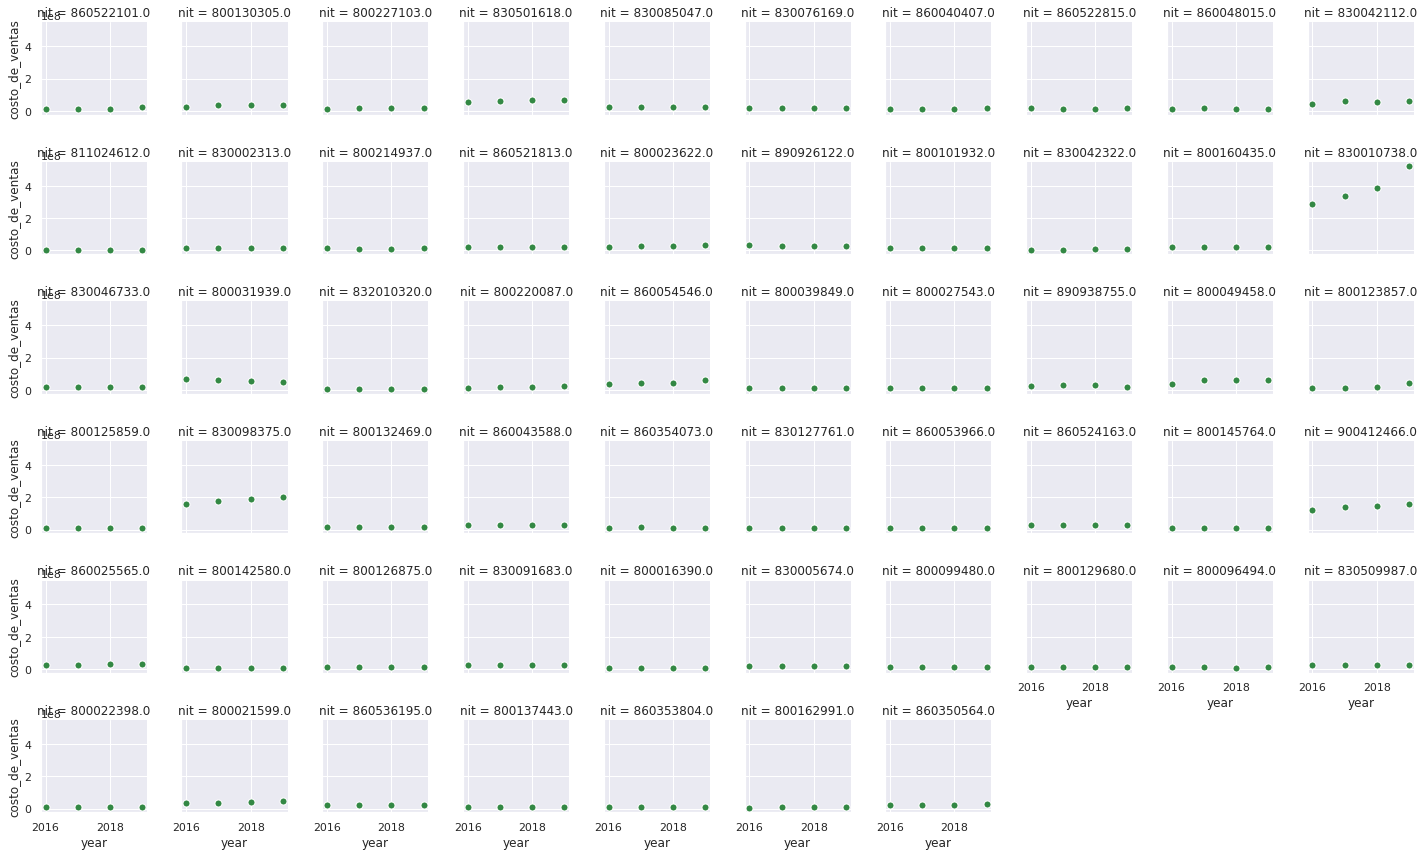

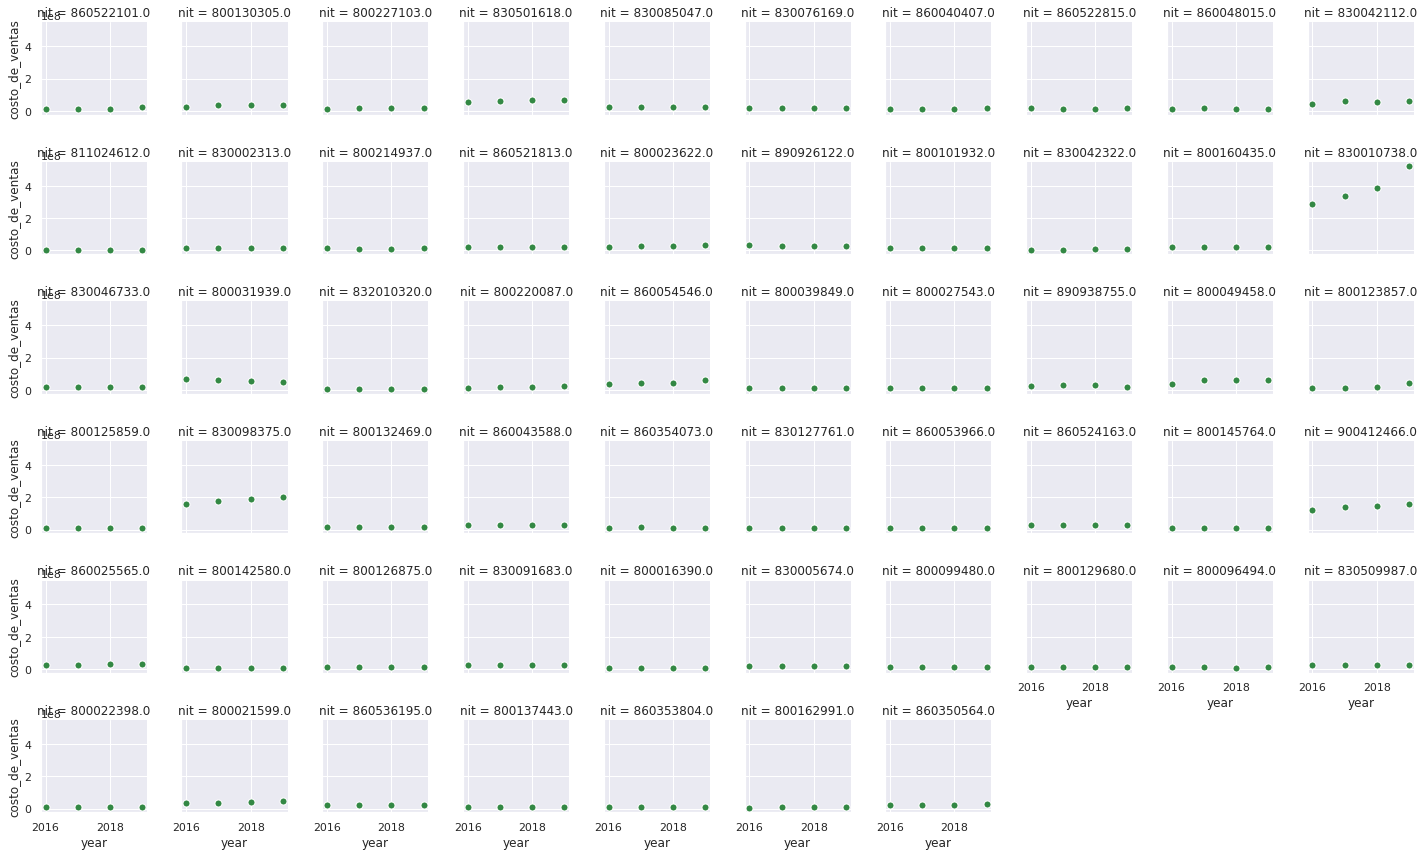

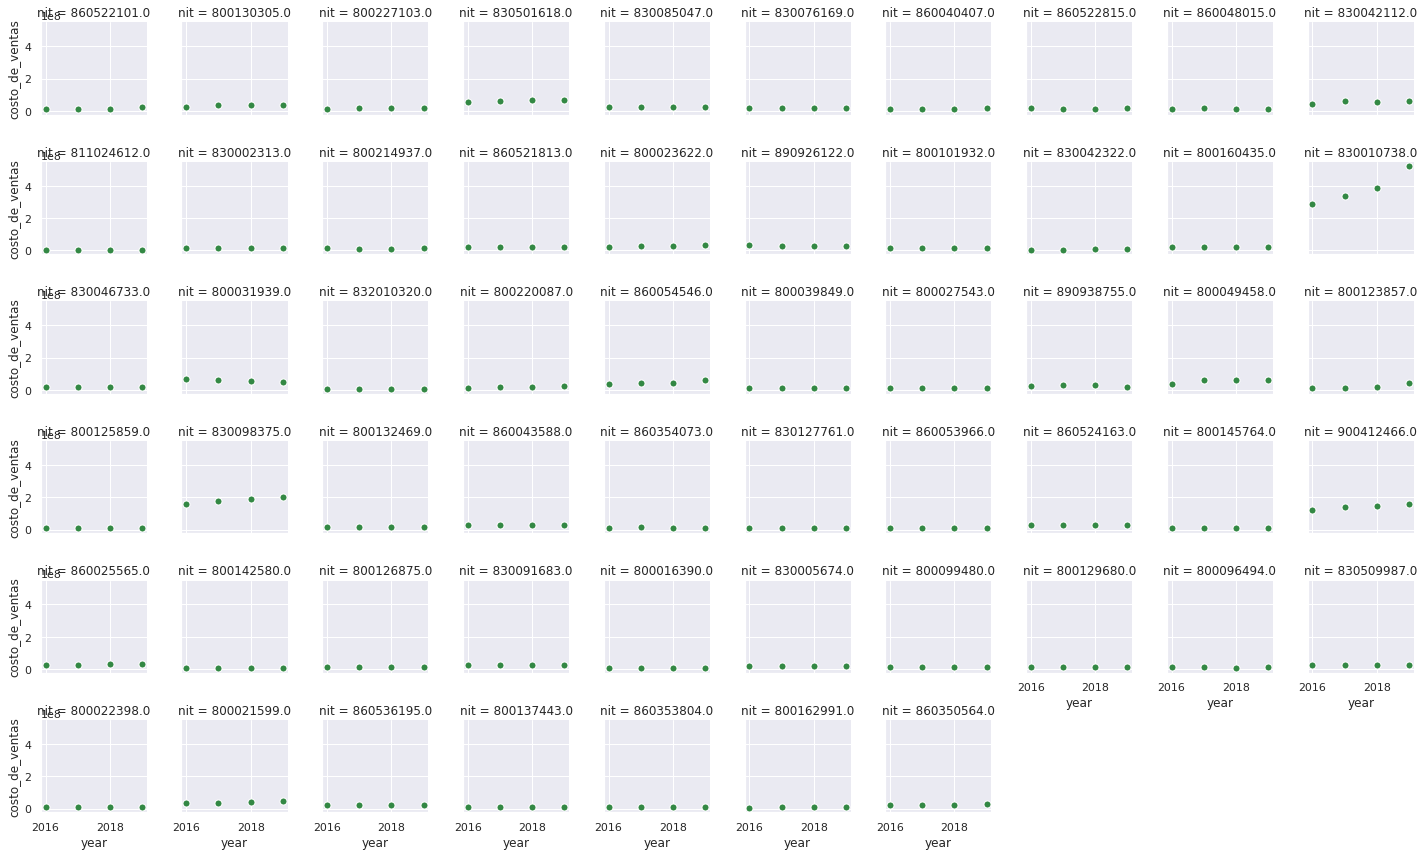

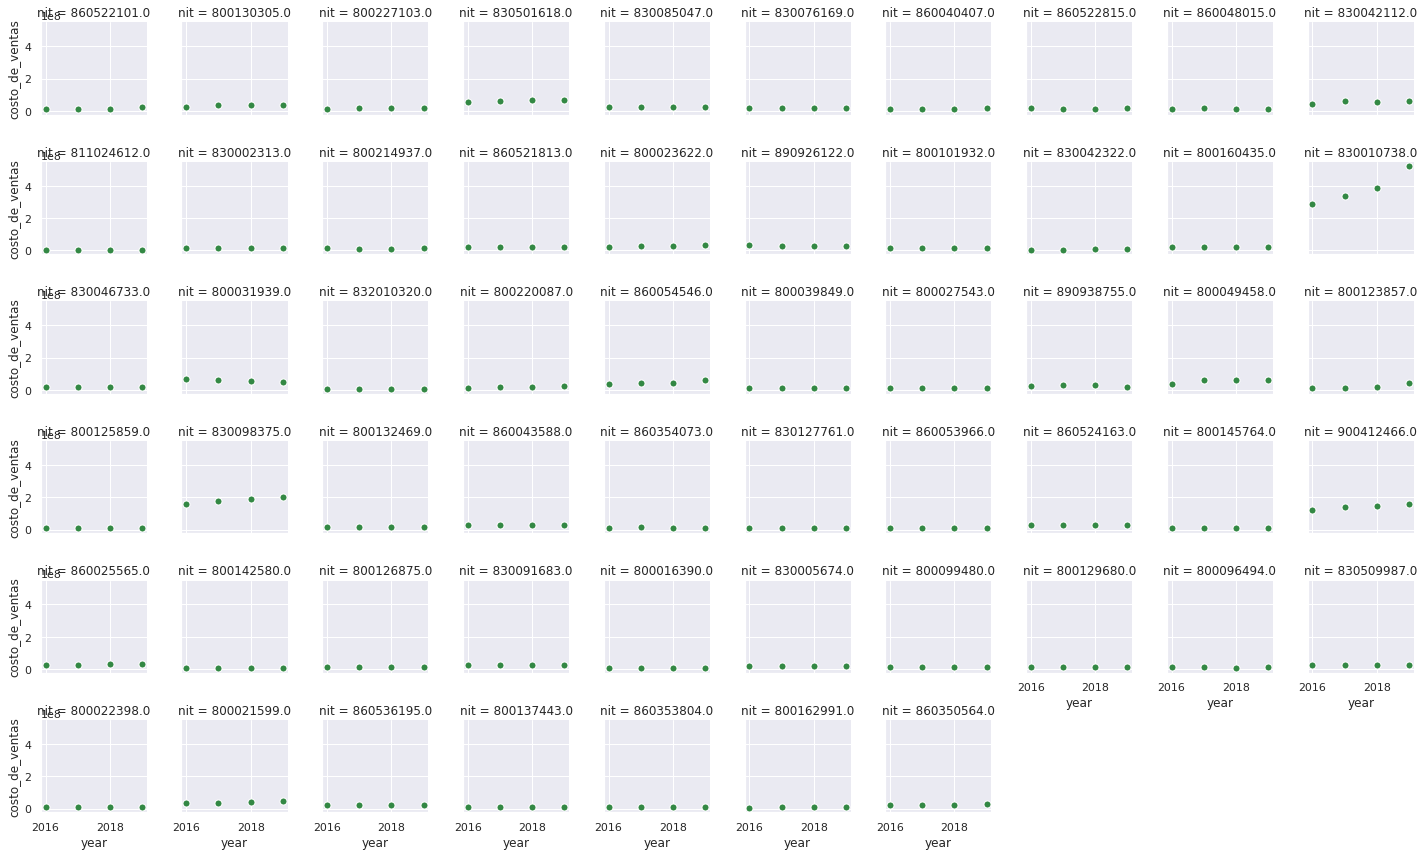

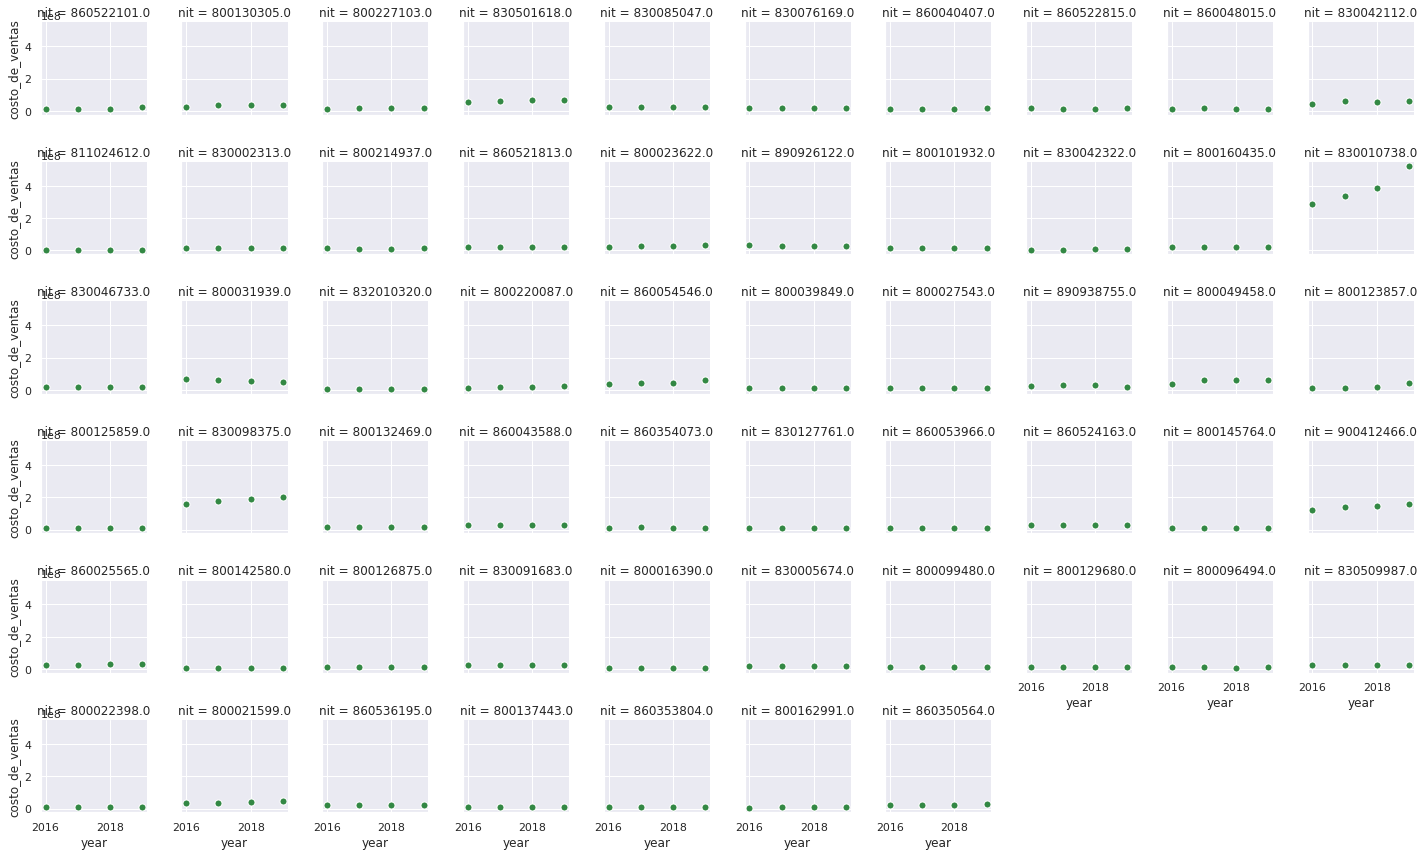

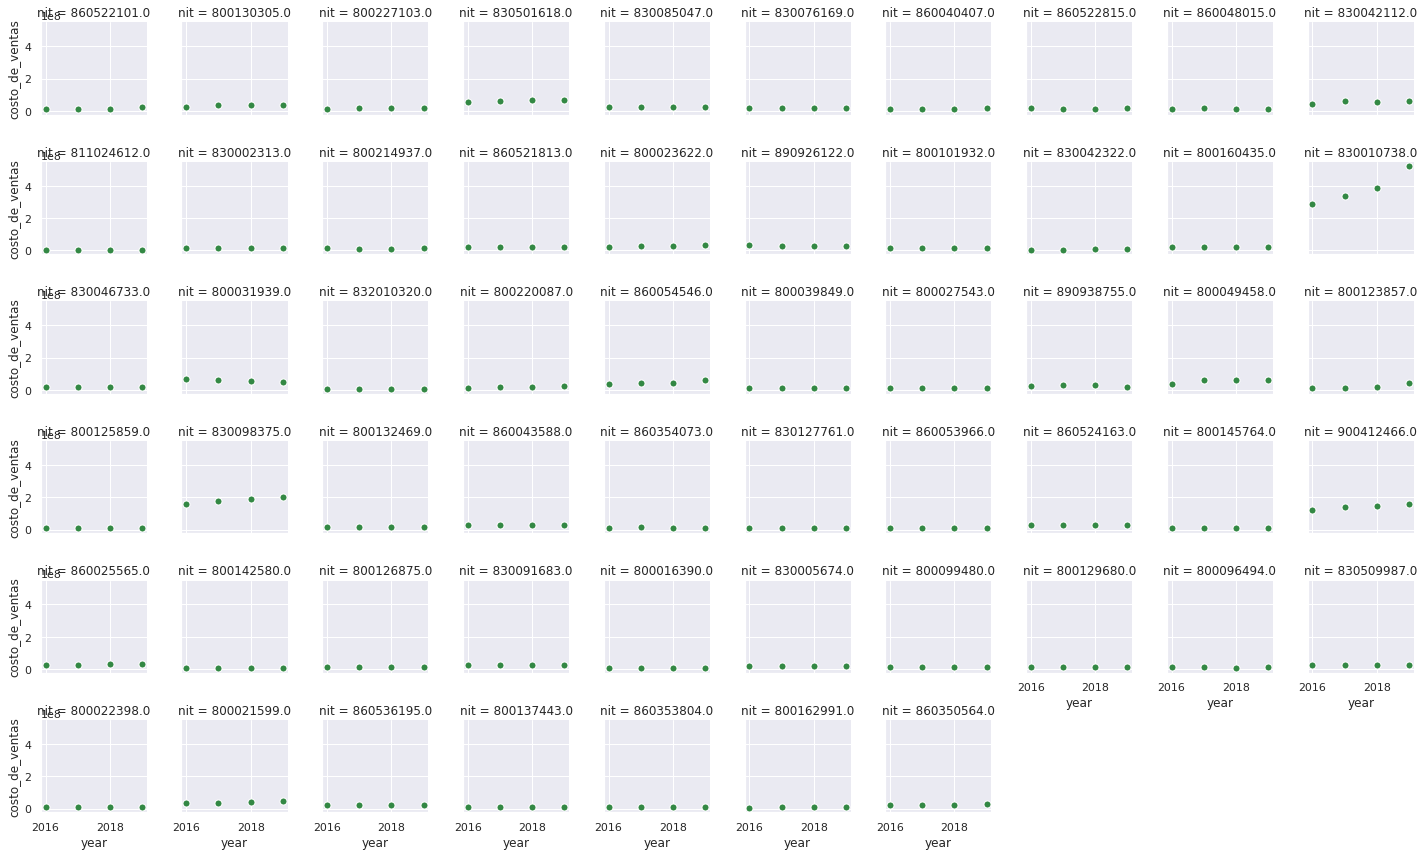

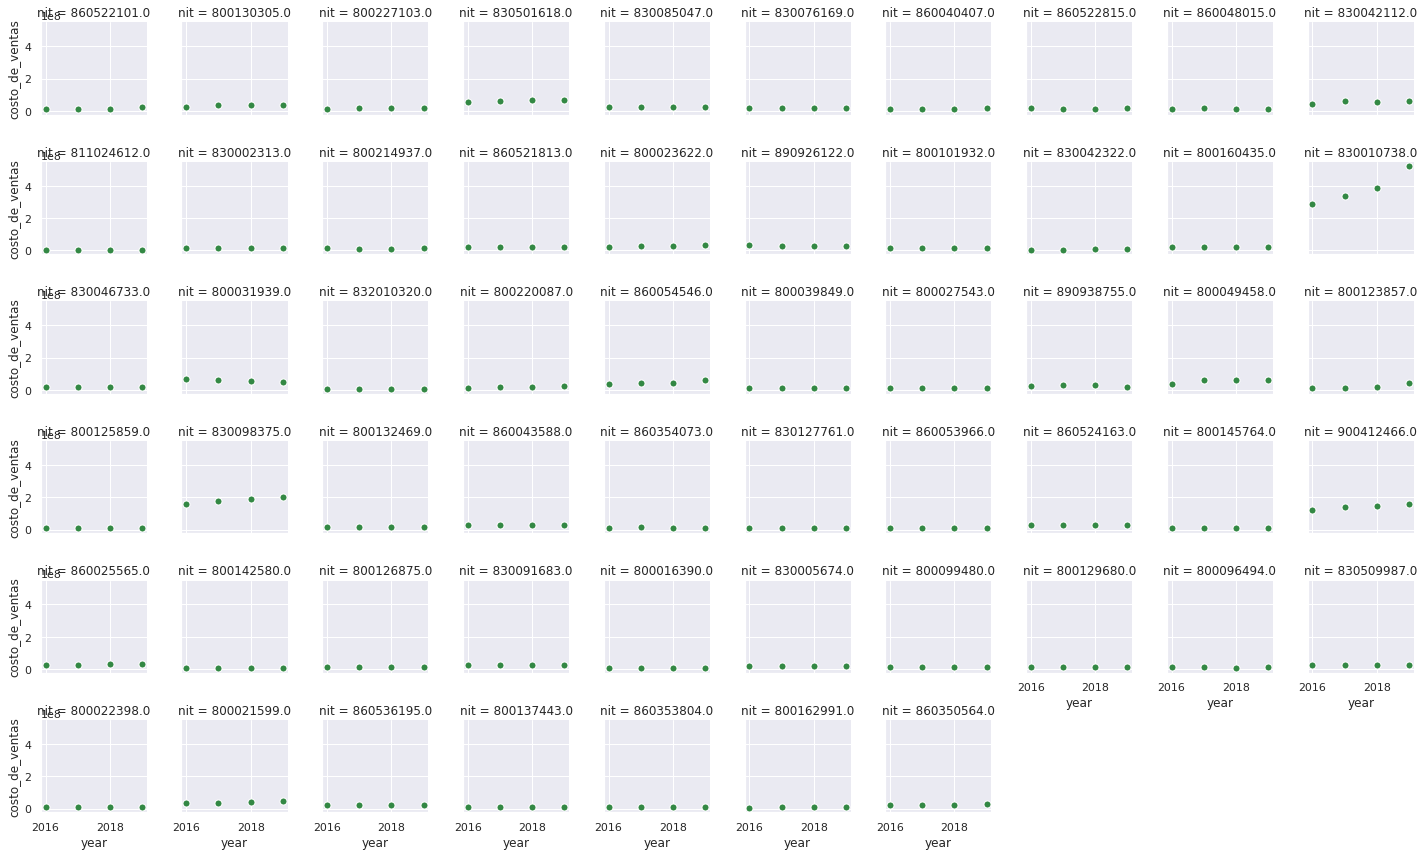

In [56]:
columns = [name for name in data.columns.to_list() if name not in ["costo_de_ventas","nit"]]

for i,var in enumerate(columns):    
    g = sns.FacetGrid(data, col="nit", margin_titles=True, height=2, col_wrap=10)
    g.map(plt.scatter, "year", "costo_de_ventas", color="#338844", edgecolor="white", s=50, lw=1)

# 4. ENTRENAMIENTO DEL MODELO

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nit                              228 non-null    object 
 1   costo_de_ventas                  228 non-null    float64
 2   year                             228 non-null    int64  
 3   tasa_de_intervencion             228 non-null    float64
 4   balance_en_cuenta_corriente_usd  228 non-null    int64  
 5   inflacion                        228 non-null    float64
 6   desempleo                        228 non-null    float64
 7   pib_usd                          228 non-null    int64  
 8   trm                              228 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 27.8+ KB


In [58]:
data = data.sort_values(by=["nit","year"])

In [59]:
#from sklearn import preprocessing
#data["costo_de_ventas"] = preprocessing.scale(data["costo_de_ventas"].values)
#data['tasa_de_intervencion'] = preprocessing.scale(data['tasa_de_intervencion'].values)
#data['inflacion'] = preprocessing.scale(data['inflacion'].values)

## Definición del modelo

In [60]:
y = 'costo_de_ventas'
modelo = list(data.columns.values)
modelo = [label for label in modelo if label != y]
modelo = [label for label in modelo if label != 'nit']
#modelo = [label for label in modelo if label != 'year']
#modelo = [label for label in modelo if label != 'tasa_de_intervencion']
modelo = [label for label in modelo if label != 'balance_en_cuenta_corriente_usd']
modelo = [label for label in modelo if label != 'inflacion']
modelo = [label for label in modelo if label != 'desempleo']
modelo = [label for label in modelo if label != 'pib_usd']
modelo = [label for label in modelo if label != 'trm']
modelo = ' + '.join(modelo)
modelo = y + ' ~ ' + modelo
modelo

'costo_de_ventas ~ year + tasa_de_intervencion'

## Datos de Entrenamiento y Prueba

In [61]:
train = data[data["year"]!=2019]
test = data[data["year"]==2019]

In [62]:
yTest = test["costo_de_ventas"].tolist()
xTest = test.drop("costo_de_ventas",axis=1)

## Entrenamiento

In [63]:
md = smf.mixedlm(modelo, train, groups=train["nit"])
mdf = md.fit()
print(mdf.summary())

                                Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             costo_de_ventas    
No. Observations:             171                 Method:                         REML               
No. Groups:                   57                  Scale:                          51780343420948.4375
Min. group size:              3                   Likelihood:                     -3031.6093         
Max. group size:              3                   Converged:                      Yes                
Mean group size:              3.0                                                                    
-----------------------------------------------------------------------------------------------------
                            Coef.            Std.Err.      z    P>|z|      [0.025          0.975]    
-----------------------------------------------------------------------------------------------------
Intercept   

# 5. EVALUACIÓN DEL MODELO

In [64]:
yPre = mdf.predict(exog=xTest)

In [65]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [66]:
from sklearn.metrics import mean_squared_error,r2_score

R2 = r2_score(yTest, yPre)
MAPE = mape(yTest, yPre)
RMSE = mean_squared_error(yTest, yPre)

print('R2: ', R2)
print('MAPE: ', MAPE)
print('RMSE: ', RMSE)

R2:  -0.000920595661199064
MAPE:  171.28454869318216
RMSE:  5319997393133986.0


## Refinamiento de los datos para obtención de un modelo más ajustado

> Se crean subcategorías para separar las empresas según su **costo de ventas** en cuartiles

In [67]:
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
data['subcategoria'] = pd.qcut(data['costo_de_ventas'],  q=4, labels = quartiles )
# data['subcategoria'].value_counts()

> Se define la función de **remove_outlier** para realizar remoición de outliers con ayuda del rango intercuartil

In [69]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [71]:
data = remove_outlier (data, 'costo_de_ventas')

> Se verifica las empresas que estén presentes en los cuatro años

In [73]:
nits = data['nit'].value_counts().reset_index()
nits = nits[nits['nit']==4]
nits = list(nits['index'])
data = data[data['nit'].isin(nits)]

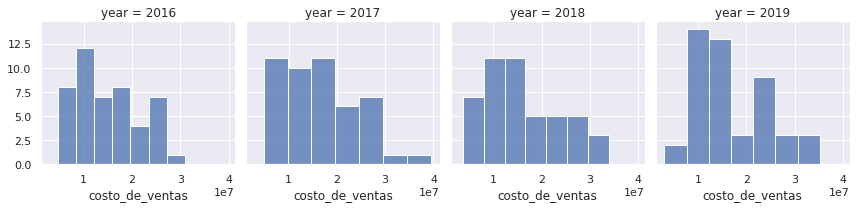

In [74]:
# Histograma costo_de_ventas por año
graph = sns.FacetGrid(data, col="year")
graph.map(sns.histplot,"costo_de_ventas")
# graph.map(sns.histplot,"inflacion")

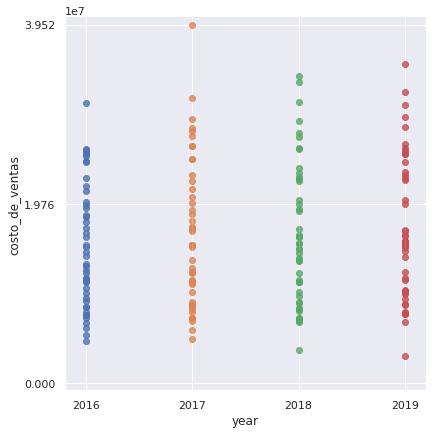

In [75]:
# Se grafica nuevamente el costo de ventas por año como region de puntos para tener una idea de cómo es su distribución
max_y = data.costo_de_ventas.max()
graph = sns.PairGrid(data, y_vars=["costo_de_ventas"], x_vars=["year"], height=6, hue="year")
graph.map(sns.regplot)
graph.set(xlim=(2015.8, 2019.2), ylim=(-max_y*.02, max_y*1.02), yticks=[0, max_y//2, max_y], xticks=[2016, 2017, 2018, 2019])
# graph.add_legend()

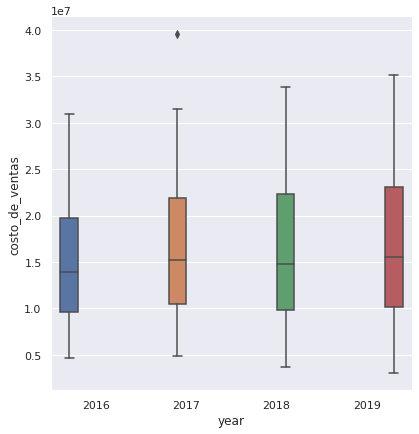

In [77]:
graph = sns.PairGrid(data, y_vars=["costo_de_ventas"], x_vars=["year"], height=6, hue="year")
graph.map(sns.boxplot)

>De los gráficos anteiores se puede ver que se ha mejorado la distribución de los datos y se tiene una agrupación de los mismos un poco más centrada

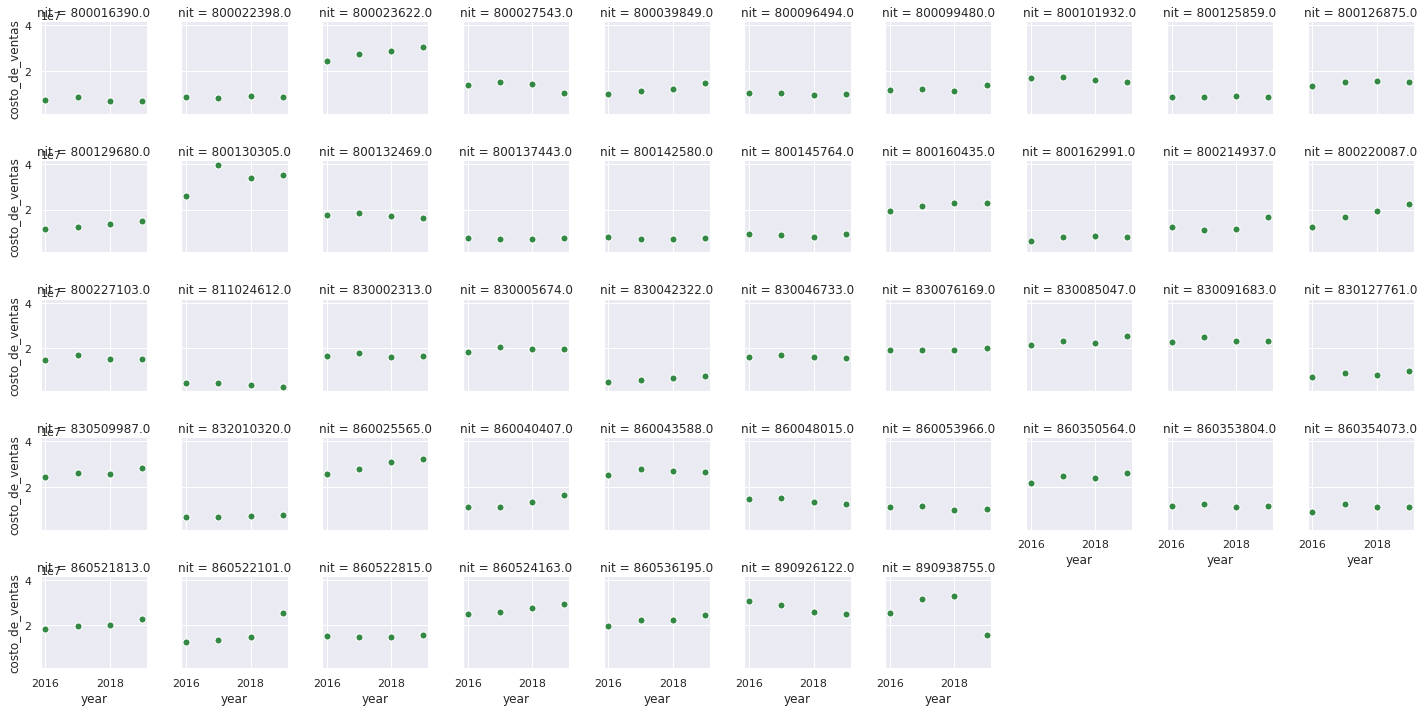

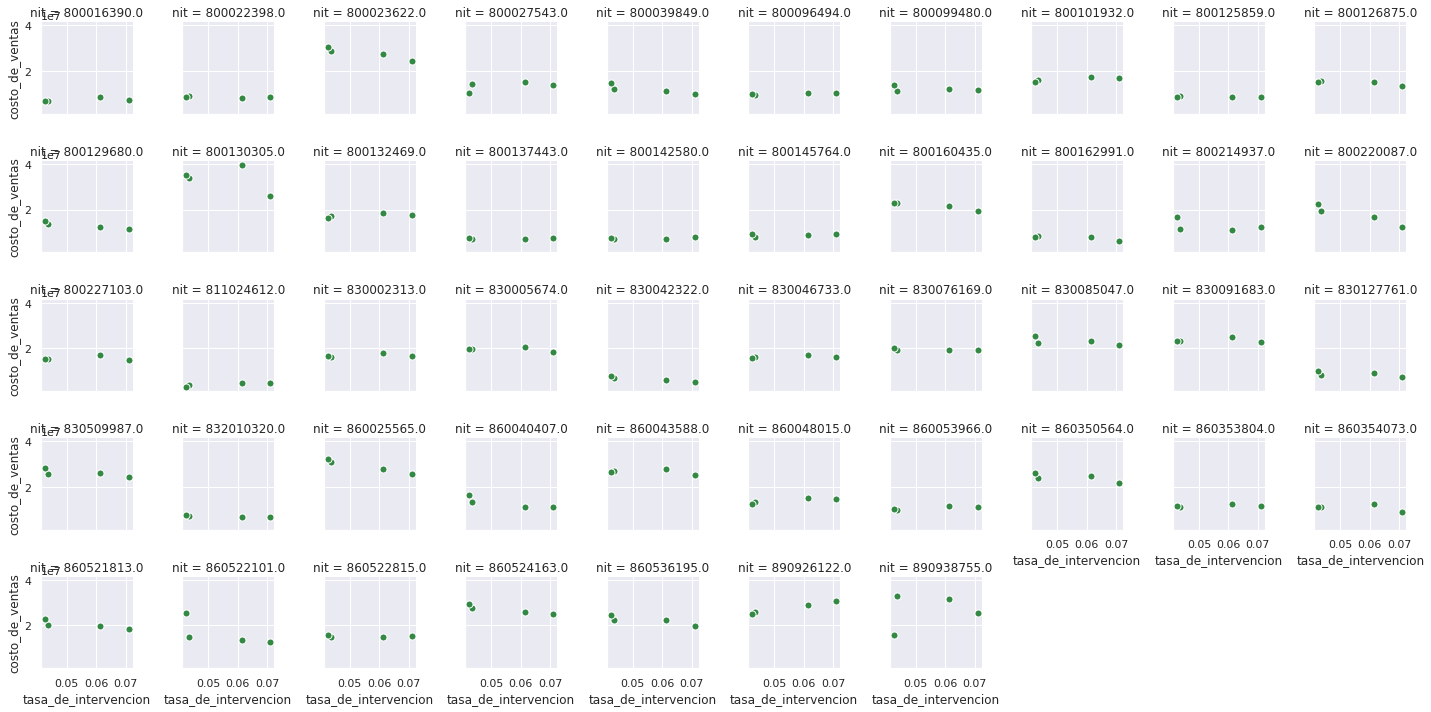

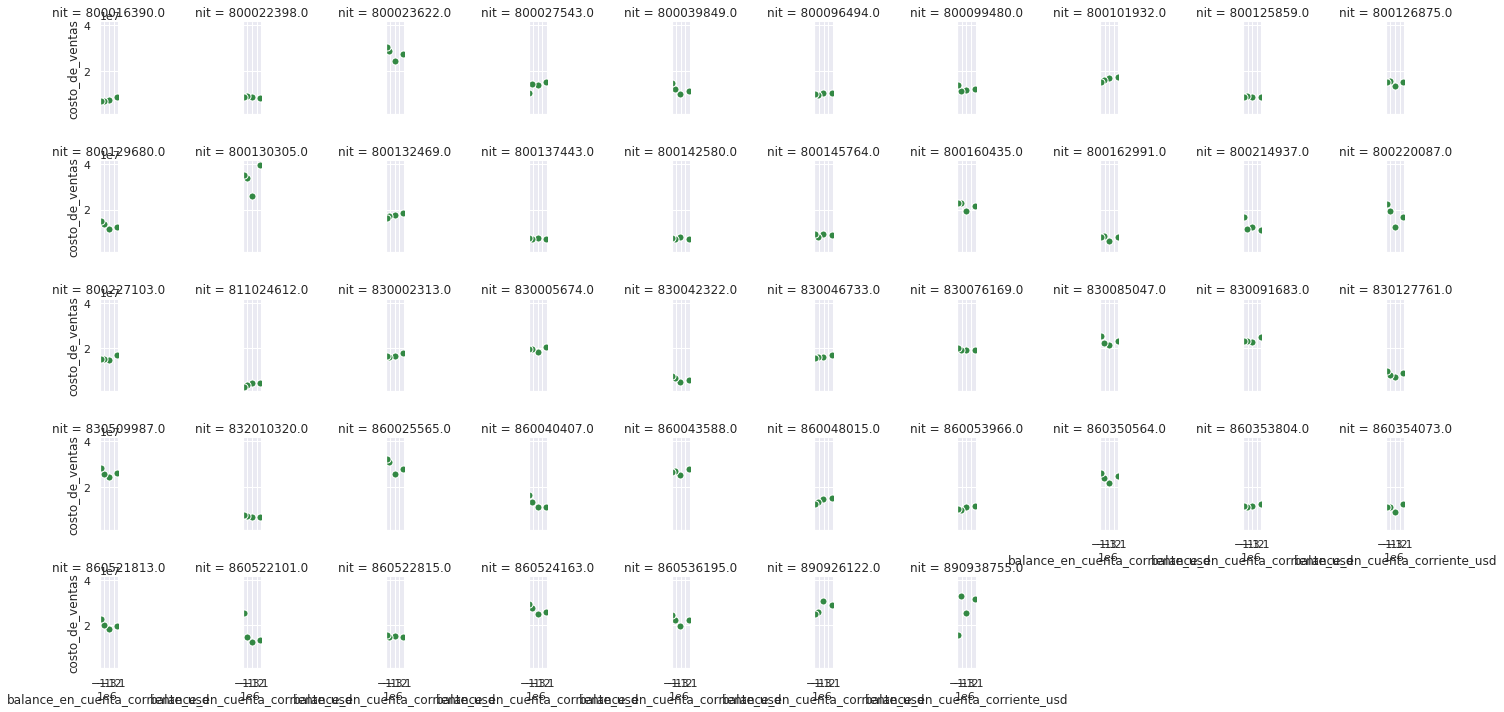

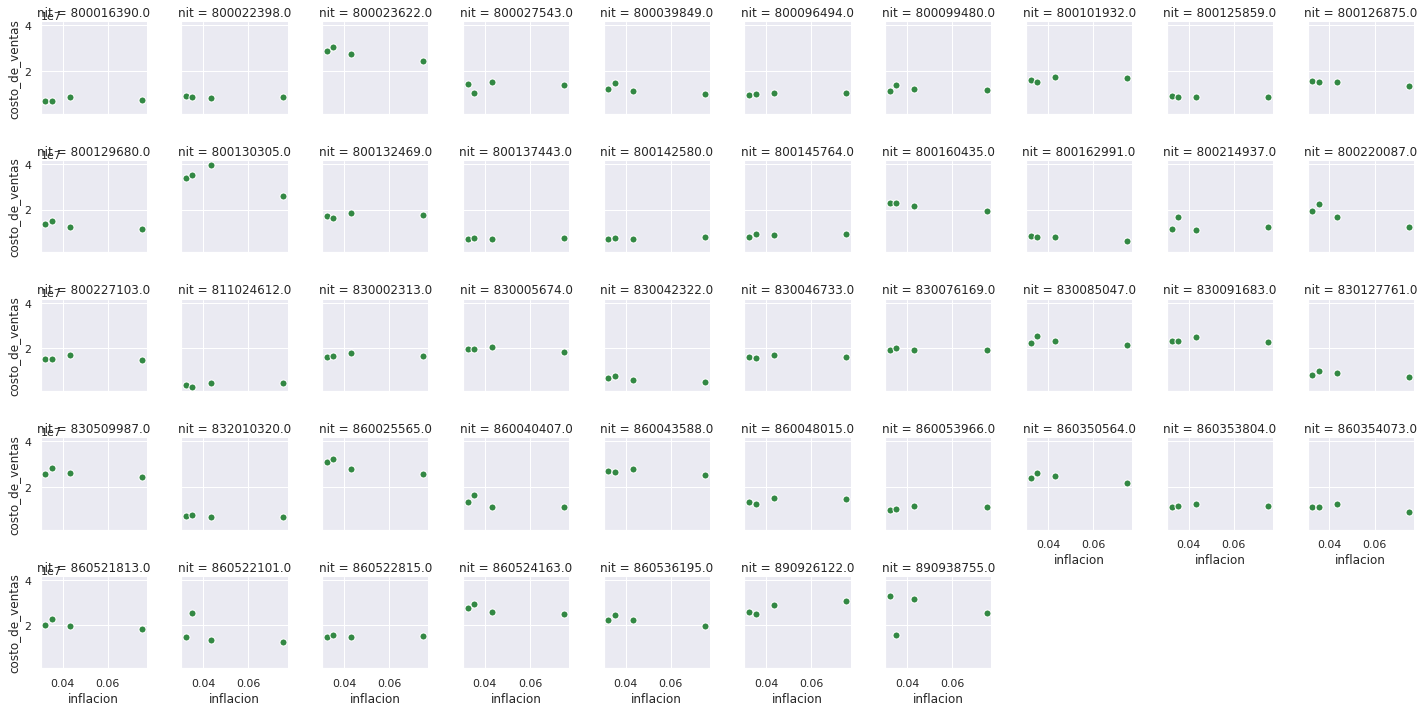

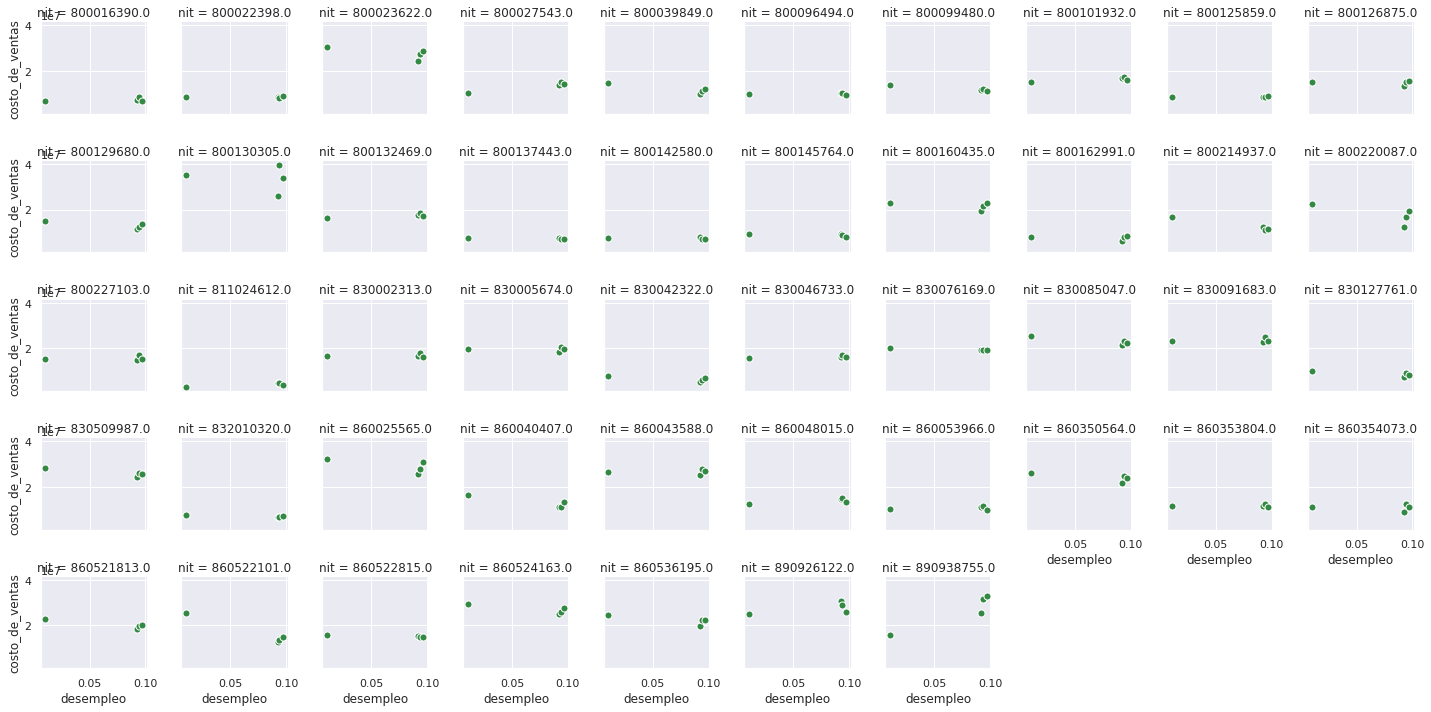

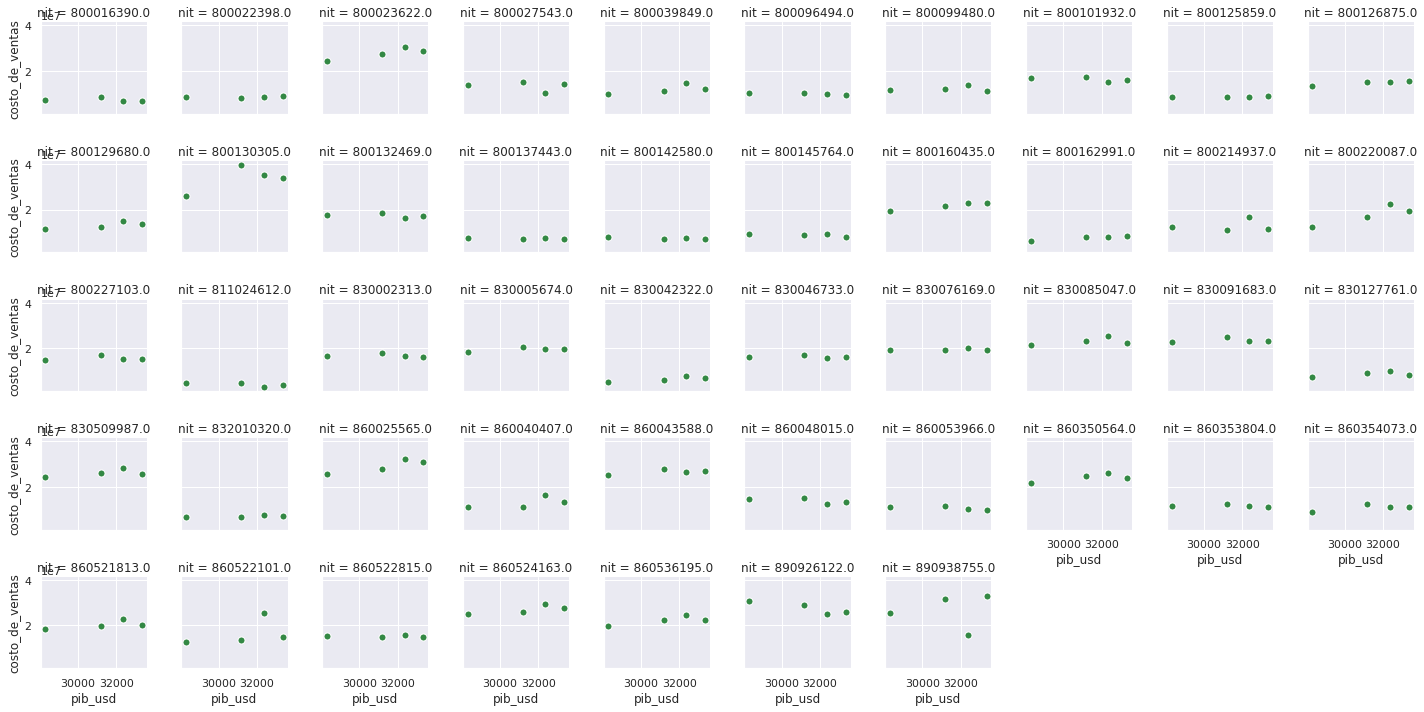

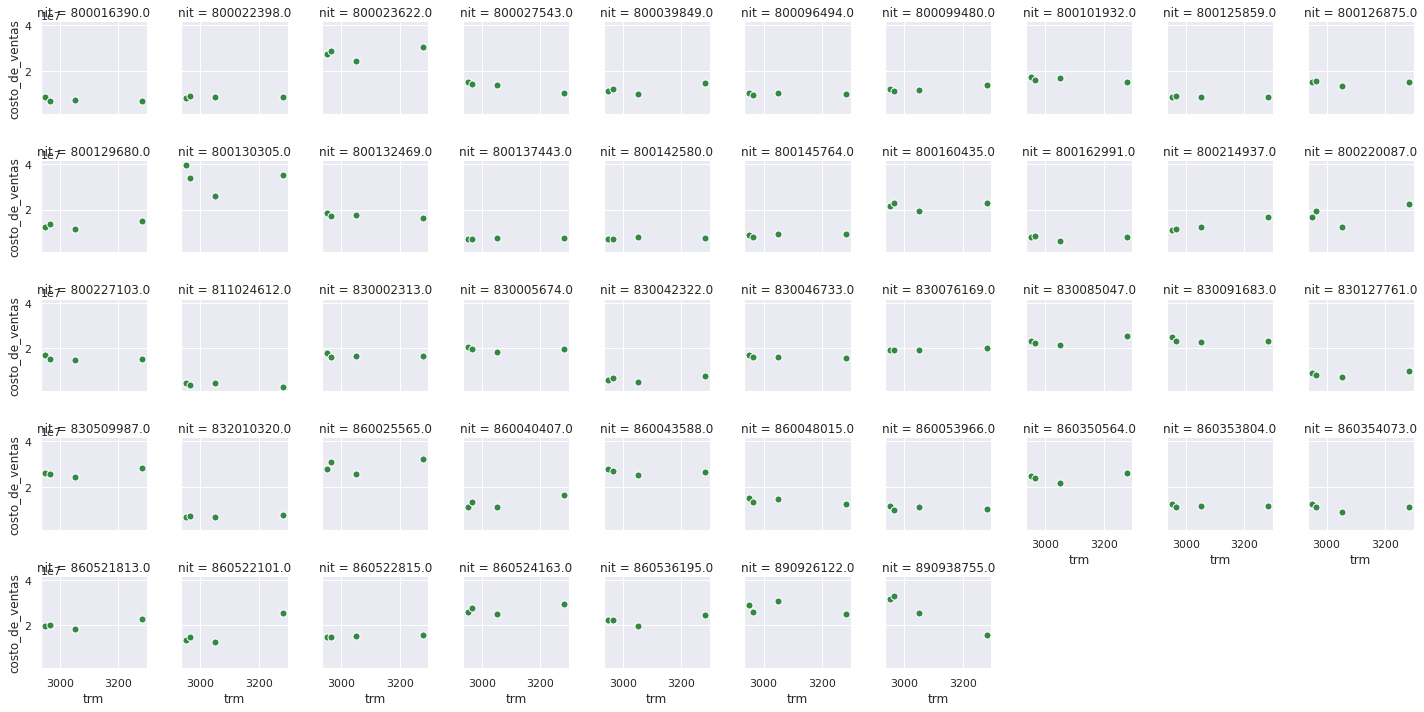

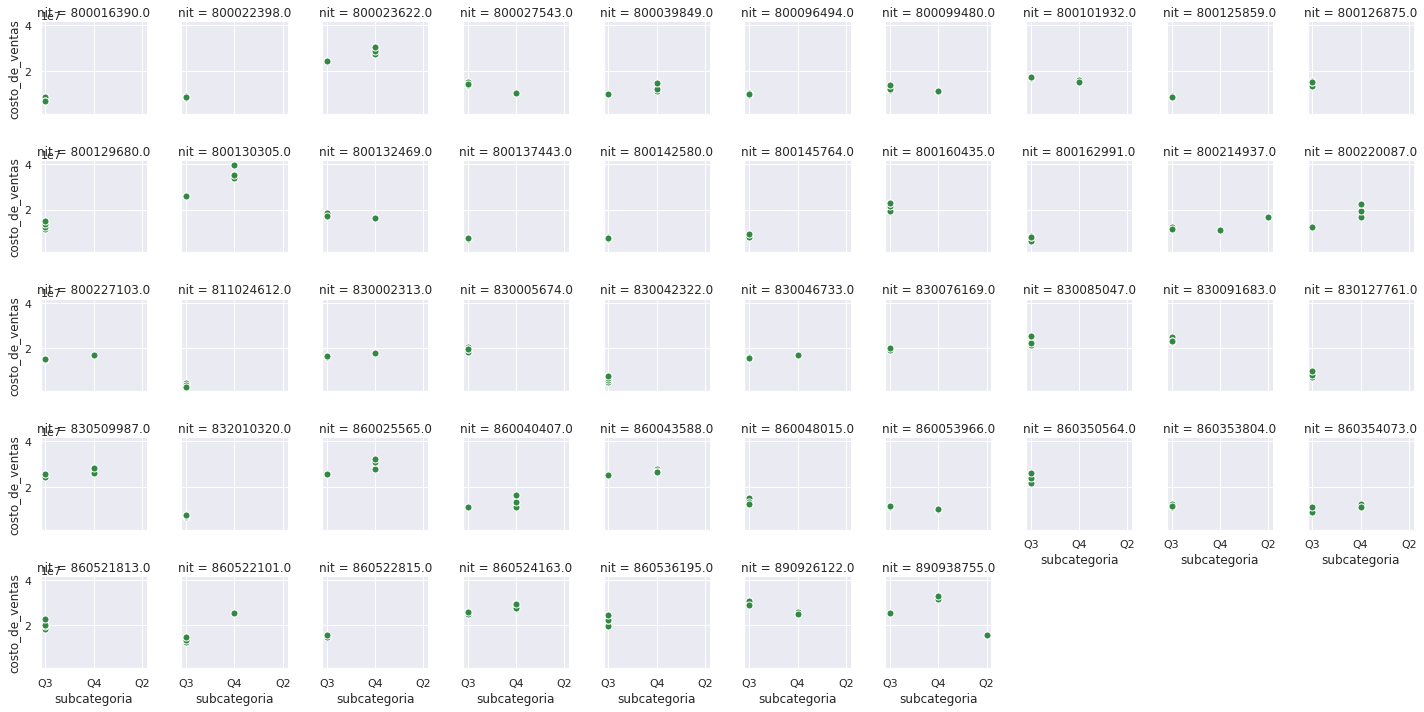

In [101]:
columns = [name for name in data.columns.to_list() if name not in ["costo_de_ventas","nit"]]
for i,var in enumerate(columns):    
    g = sns.FacetGrid(data, col="nit", margin_titles=True, height=2, col_wrap=10)
    g.map(plt.scatter, var, "costo_de_ventas", color="#338844", edgecolor="white", s=50, lw=1)

## Se ajusta nuevamente el modelo 

In [89]:
y = 'costo_de_ventas'
modelo = list(data.columns.values)
modelo = [label for label in modelo if label != y]
modelo = [label for label in modelo if label != 'nit']
#modelo = [label for label in modelo if label != 'year']
modelo = [label for label in modelo if label != 'tasa_de_intervencion']
modelo = [label for label in modelo if label != 'balance_en_cuenta_corriente_usd']
modelo = [label for label in modelo if label != 'inflacion']
modelo = [label for label in modelo if label != 'desempleo']
modelo = [label for label in modelo if label != 'pib_usd']
# modelo = [label for label in modelo if label != 'trm']
#modelo = [label for label in modelo if label != 'subcategoria']
modelo = ' + '.join(modelo)
modelo = y + ' ~ ' + modelo
modelo

'costo_de_ventas ~ year + trm + subcategoria'

In [90]:
train = data[data["year"]!=2019]
test = data[data["year"]==2019]

In [91]:
yTest = test["costo_de_ventas"].tolist()
xTest = test.drop("costo_de_ventas",axis=1)

In [92]:
md = smf.mixedlm(modelo, train, groups=train["nit"])
mdf = md.fit()
print(mdf.summary())

                            Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           costo_de_ventas   
No. Observations:           141               Method:                       REML              
No. Groups:                 47                Scale:                        1707057524370.1377
Min. group size:            3                 Likelihood:                   -2181.1339        
Max. group size:            3                 Converged:                    Yes               
Mean group size:            3.0                                                               
----------------------------------------------------------------------------------------------
                         Coef.           Std.Err.     z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------------------------
Intercept              -676453801.256 492938854.156 -1.372 0.170 -1642596201.98

## Se evalua el modelo

In [93]:
yPre = mdf.predict(exog=xTest)

In [94]:
from sklearn.metrics import mean_squared_error,r2_score

R2 = r2_score(yTest, yPre)
MAPE = mape(yTest, yPre)
RMSE = mean_squared_error(yTest, yPre)

print('R2: ', R2)
print('MAPE: ', MAPE)
print('RMSE: ', RMSE)

R2:  0.7237068378804792
MAPE:  28.583279206161315
RMSE:  16725978986558.322


Con el proceso de remoción de outliers se puede ver que se ha mejorado la respuesta del modelo, se logra un $R2:  0.72$, frente a un $R2: -0.0009$ del modelo anterior

Referencias:
https://www.kaggle.com/ojwatson/mixed-models